# Recommender Systems with Python

This notebook focuses on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

Let's get started!

## Import Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
import seaborn as sns

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

## Get the Data

In [68]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movie_titles = pd.read_csv("Movie_Id_Titles")
df = pd.read_csv('u.data', sep='\t', names=column_names)
df.head()
movie_titles.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [69]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

#### Let's create a ratings dataframe with average rating and number of ratings:

In [71]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.33,9
1-900 (1994),2.60,5
101 Dalmatians (1996),2.91,109
12 Angry Men (1957),4.34,125
187 (1997),3.02,41


#### Top 5 movies with the highest number of ratings.

In [90]:
ratings.sort_values(by=['num of ratings'], ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.36,584
Contact (1997),3.80,509
Fargo (1996),4.16,508
Return of the Jedi (1983),4.01,507
Liar Liar (1997),3.16,485


#### Now a few histograms:

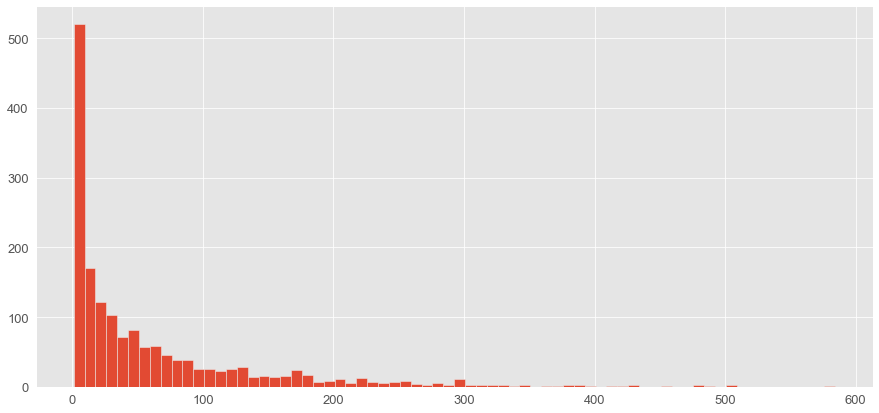

In [93]:
plt.figure(figsize=(15,7));
ratings['num of ratings'].hist(bins=70);

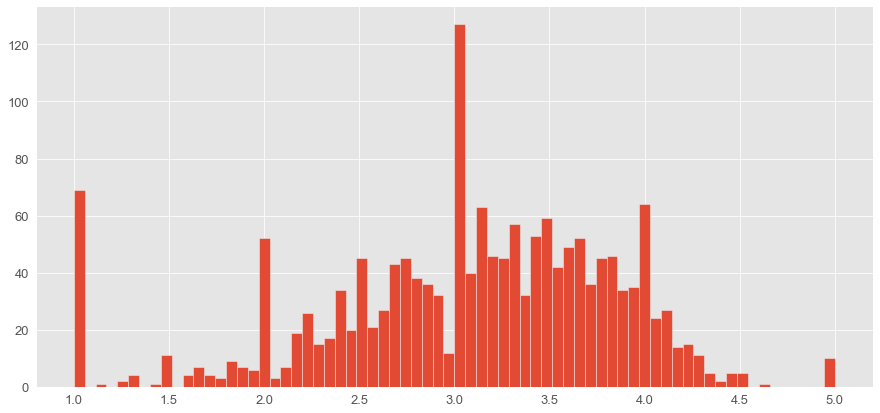

In [94]:
plt.figure(figsize=(15,7));
ratings['rating'].hist(bins=70);

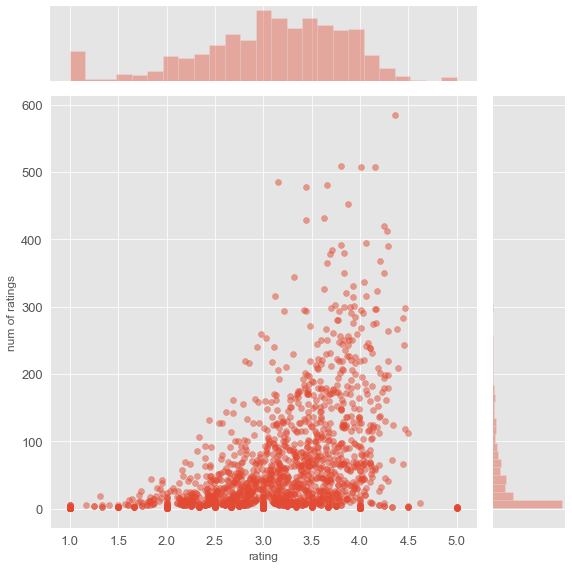

In [101]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5, height=8);

- There is an exponential relationship between **user rating** and **number of ratings**.

**Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:**

## Recommending Similar Movies

In [22]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Most rated movie:

In [23]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


- **Star Wars(1977)** followed by **Contact(1977)** recieved the highest number of ratings.

#### Let's consider two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

#### Now let's grab the user ratings for those two movies:

In [102]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

**We can then use corrwith() method to get correlations between two pandas series:**

In [26]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/vedantthapa/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/vedantthapa/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Let's clean this by removing NaN values and using a DataFrame instead of a series:**

In [103]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
Star Wars (1977),1.00
"Empire Strikes Back, The (1980)",0.75
Return of the Jedi (1983),0.67
Raiders of the Lost Ark (1981),0.54
Austin Powers: International Man of Mystery (1997),0.38


**Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).**

In [104]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Star Wars (1977),1.00
"Empire Strikes Back, The (1980)",0.75
Return of the Jedi (1983),0.67
Raiders of the Lost Ark (1981),0.54
Austin Powers: International Man of Mystery (1997),0.38


**Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).**

In [39]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


**Now sort the values and notice how the titles make a lot more sense:**

In [45]:
similar_to_starwars = corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()
similar_to_starwars

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


**Now the same for the comedy Liar Liar:**

In [41]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


**Let's create a function to do the same for any specified movie.**

In [106]:
def movie_recommender(movie_name, no_of_movies=6):
    corr_movie = pd.DataFrame(moviemat.corrwith(moviemat[movie_name]), columns=['Correlation']).dropna()
    corr_movie = corr_movie.sort_values('Correlation',ascending=False)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    corr_movie = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head(no_of_movies)
    return corr_movie[1:]

movie_recommender('Mask, The (1994)')

,Correlation,num of ratings
title,,
As Good As It Gets (1997),0.62,112
"Hunchback of Notre Dame, The (1996)",0.57,127
Volcano (1997),0.57,219
Tomorrow Never Dies (1997),0.57,180
"Craft, The (1996)",0.56,104


___